# Credit Card Fraud Detection

<img src="ccfd.png" width = '800' height = '400' />

### Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.



It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 



As our dataset is highly imbalanced, so we shouldn't use accuracy score as a metric because it will beusually high and misleading, instead use we should focus on f1-score, precision/recall score or confusionmatrix.

In [1]:
# Import Libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly 
import datetime 
import math 
import matplotlib
import sklearn 
from IPython.display import HTML
from IPython.display import YouTubeVideo

import pickle 
import os

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff 
from plotly.subplots import make_subplots 
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('creditcard.csv', encoding='latin_1')
# Converting all column names to lower case
df.columns = df.columns.str.lower()
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


1. Due to confidentiality issue, original features V1, V2,... V28 have been transformed,however, we may guess that these features might be originally credit card number, expiry date,CVV, cardholder name, transaction location, transaction date-time, etc.
2. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
time      284807 non-null float64
v1        284807 non-null float64
v2        284807 non-null float64
v3        284807 non-null float64
v4        284807 non-null float64
v5        284807 non-null float64
v6        284807 non-null float64
v7        284807 non-null float64
v8        284807 non-null float64
v9        284807 non-null float64
v10       284807 non-null float64
v11       284807 non-null float64
v12       284807 non-null float64
v13       284807 non-null float64
v14       284807 non-null float64
v15       284807 non-null float64
v16       284807 non-null float64
v17       284807 non-null float64
v18       284807 non-null float64
v19       284807 non-null float64
v20       284807 non-null float64
v21       284807 non-null float64
v22       284807 non-null float64
v23       284807 non-null float64
v24       284807 non-null float64
v25       284807 non-null float64
v26  

1. Dataset contains details of 284807 transactions with 31 features.There is no missing data in our dataset, every column contain exactly 284807 rows.
2. All data types are float64, except 1: ClassAll data types are float64, except 1: Class28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V283 columns: TIME, AMOUNT and CLASS which can be analysed.
3. Memory Usage: 67.4 MB

In [5]:
df.shape

(284807, 31)

In [6]:
print(df['class'].value_counts())
print('\n')
print(df['class'].value_counts(normalize=True))

0    284315
1       492
Name: class, dtype: int64


0    0.998273
1    0.001727
Name: class, dtype: float64


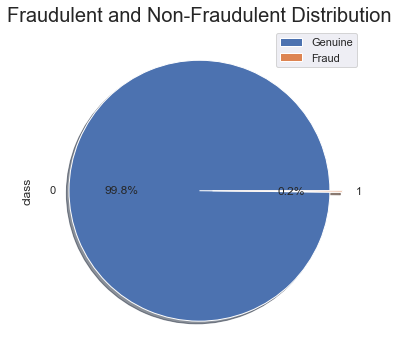

In [7]:
df["class"].value_counts().plot(kind='pie',explode=[0,0.1],figsize=(6,6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Genuine","Fraud",])
plt.show()

In [8]:
a=df['class'].value_counts()
a

0    284315
1       492
Name: class, dtype: int64

This dataset has 492 frauds out of 284,315 transactions. The dataset is highly unbalanced, the positiveclass (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use thisdataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will assume that most transactions are not a fraud. But we don't want our model to assume, we want ourmodel to detect patterns that give signs of fraud!

In [9]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


On an average, credit card transaction is happening at every 94813.86 seconds.Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like thefeature 'Amount' is highly positively skewed refers to a longer or fatter tail on the right. The mean of positively skewed data will be greater than the median.

In [10]:
# Dealing with missing data
df.isnull().sum()

time      0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
amount    0
class     0
dtype: int64

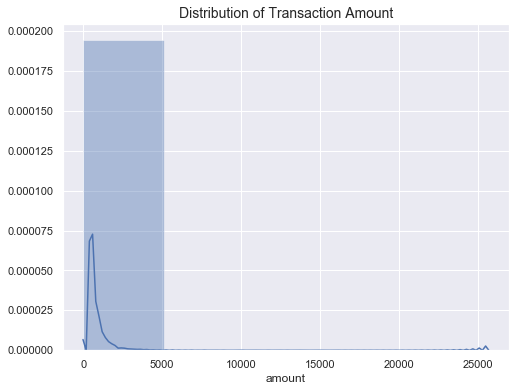

In [11]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount',fontsize=14)
sns.distplot(df['amount'],bins=5) # A bin—sometimes called a class interval—is a way of sorting data in a histogram. 
plt.show()

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really bigamount transactions and it may actually make sense to drop those outliers in our analysis if they are just afew points that are very extreme.Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions areoccurring as well.

In [12]:
print("Fraud Transaction distribution : \n",df[(df['class']==1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class']==1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class']==1)]['amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


1. There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higestfraud transaction amount was 2125.87 and lowest was just 0.00.
2. There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method forcredit cards that is used to verify a cardholders information without charging the consumer. Instead, anamount of zero is charged on the card to store the credit card information in the form of a token and todetermine whether the card is legitimate or not. 

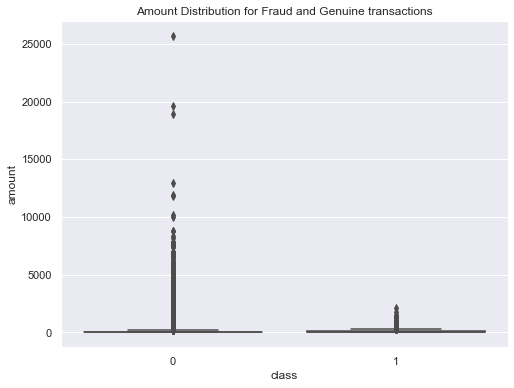

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class',y='amount',data=df)
plt.title('Amount Distribution for Fraud and Genuine transactions')
plt.show()

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really bigamount transactions 

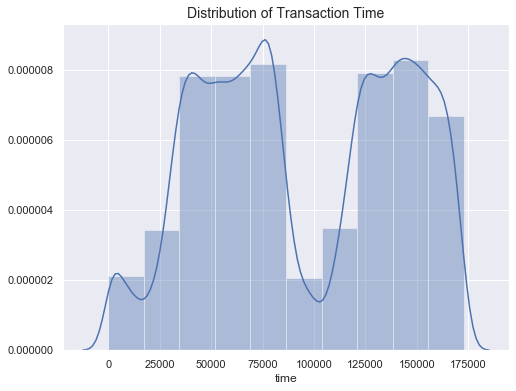

In [14]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time',fontsize=14)
sns.distplot(df['time'],bins=10)
plt.show()

We can consider this as time of the day when the peak is the day and most people do the transactions

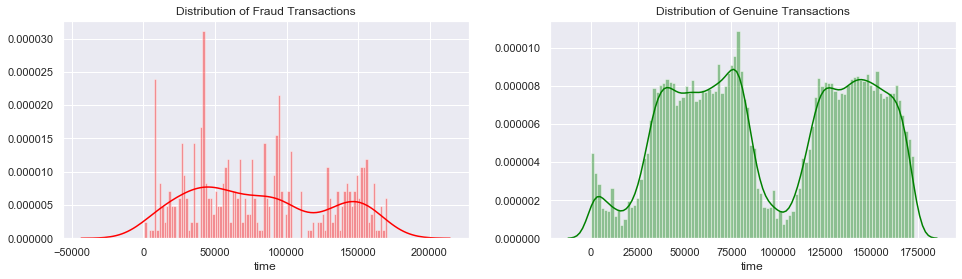

In [15]:
fig,axs=plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[(df['class']==1)]['time'],bins=100,color='red',ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")
sns.distplot(df[(df['class']==0)]['time'],bins=100,color='green',ax=axs[1])
axs[1].set_title("Distribution of Genuine Transactions")
plt.show()

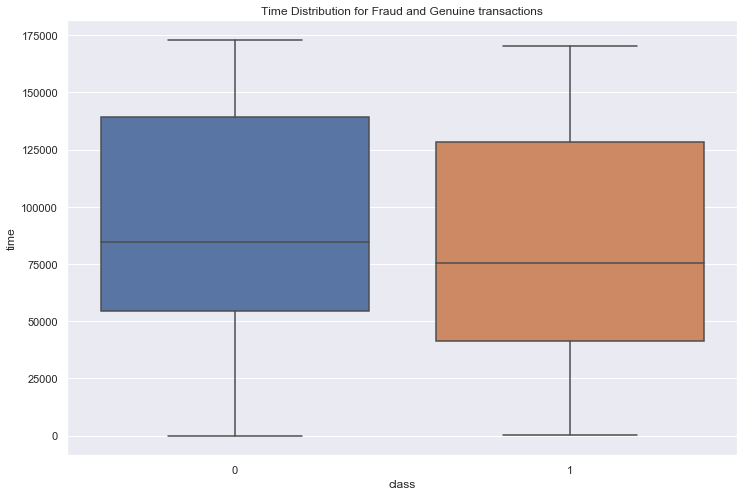

In [16]:
plt.figure(figsize=(12,8))
ax=sns.boxplot(x='class',y='time',data=df)
plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

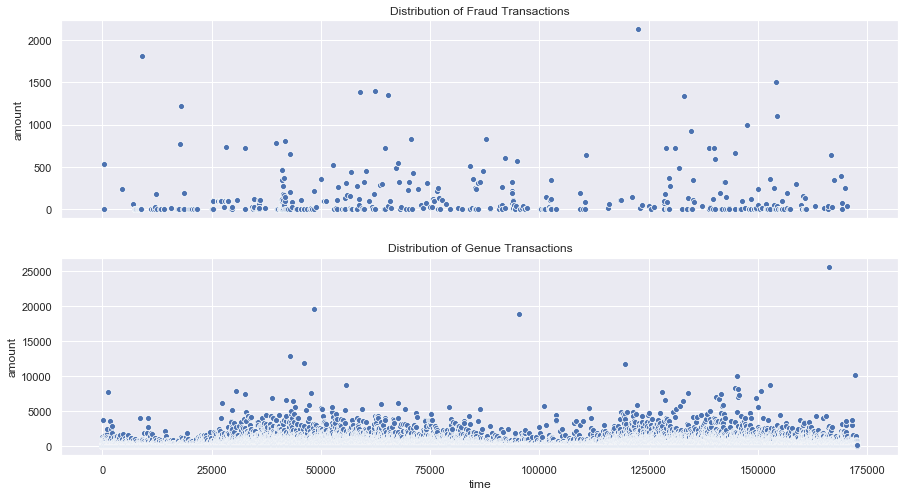

In [17]:
fig,axs=plt.subplots(nrows=2,sharex=True,figsize=(15,8))
sns.scatterplot(x='time',y='amount',data=df[df['class']==1],ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")
sns.scatterplot(x='time',y='amount',data=df[df['class']==0],ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")
plt.show()

## Removal of Outliers

We have to be careful as to how far do we want the threshold for removing outliers. We determine thethreshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, thefewer outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the moreoutliers it will detect.

The main objective is to remove "extreme outliers" from Amount Feature, rather than just outliers as we haveseen that the distribution of amount is highly skewed after about $3000 and another reason to remove theextreme outliers is that dataset is highly imbalanced and we do not want to take risk of removing the classwhich is already less in number.

In [18]:
Q3=np.percentile(df['amount'],75)
Q1=np.percentile(df['amount'],25)
cutoff=5.0
IQR=(Q3-Q1)

# Lower outlier boundry (LOB) / Lower Whisker 
LOB=Q1-(IQR*cutoff)
print(f"Lower Whisker : {LOB}")


# Upper outlier boundry (UOB) / Upper Whisker
UOB=Q3+(IQR*cutoff)
print(f"Upper Whisker : {UOB}")



amtAllOutliers=df[(df['amount']<LOB)|(df['amount']>UOB)]['amount']
amtFrdOutliers=df[(df['class']==1)&((df['amount']<LOB)|(df['amount']>UOB))]['amount']
amtGenuOutliers=df[(df['class']==0)&((df['amount']<LOB)|(df['amount']>UOB))]['amount']




print('\n')
print("No of amount outliers : ",amtAllOutliers.count())
print("No of fraud amount outliers : ",amtFrdOutliers.count())
print("No of genuine amount outliers : ",amtGenuOutliers.count())


print("Percentage of outliers : ", round((amtGenuOutliers.count()/amtAllOutliers.count())*100,2))
print("Percentage of Fraud amount outliers : ",round((amtFrdOutliers.count()/amtAllOutliers.count())*100,2))

Lower Whisker : -352.22499999999997
Upper Whisker : 434.99


No of amount outliers :  11366
No of fraud amount outliers :  41
No of genuine amount outliers :  11325
Percentage of outliers :  99.64
Percentage of Fraud amount outliers :  0.36


There are a total number of 11366 outliers in amount columns, out of which 0.36% are fraud transactions.


### Delete Outliers

In [19]:
# check shape before deleting outliers
df.shape

(284807, 31)

In [20]:
# Removing outliers
df=df.drop(amtAllOutliers.index)

In [21]:
# check shape after deleting outliers
df.shape

(273441, 31)

In [22]:
df.reset_index(inplace=True,drop=True)

### Check Amount Distribution after deleting outliers

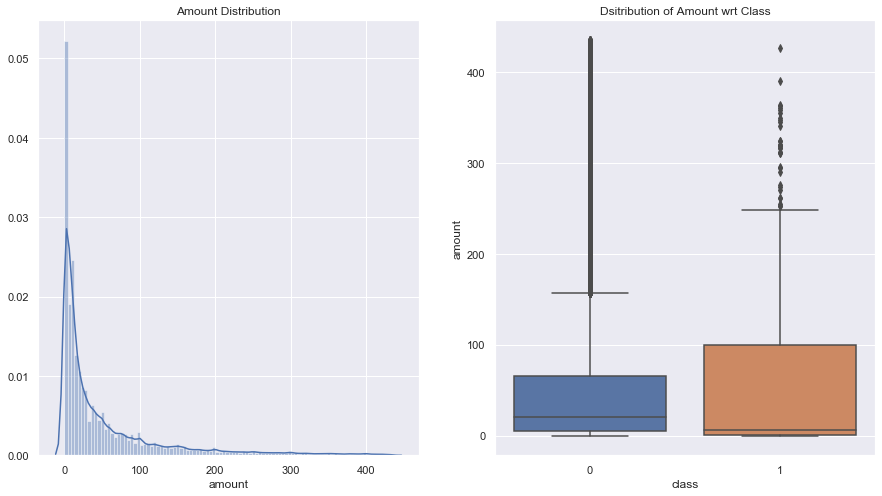

In [23]:
fig,axs=plt.subplots(ncols=2,figsize=(15,8))
sns.distplot(df['amount'],bins=100,ax=axs[0])
axs[0].set_title("Amount Distribution")
sns.boxplot(x='class',y='amount',data=df,ax=axs[1])
axs[1].set_title("Dsitribution of Amount wrt Class")
plt.show()

In [24]:
# Finging unique values for each column
df[['time','amount','class']].nunique()

time      122816
amount     24761
class          2
dtype: int64

### Correlation Among Explanatory Variables

If there is a very high correlation between two features, keepingboth of them is not a good idea most of the time not to cause overfitting.

In [25]:
df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.002600
time     -0.012475
Name: class, dtype: float64

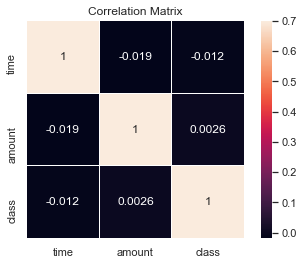

In [26]:
plt.title('Correlation Matrix')
sns.heatmap(df[['time','amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,linecolor='w',annot=True);

In [27]:
df.shape

(273441, 31)

In [28]:
df['class'].value_counts(normalize=True)

0    0.998351
1    0.001649
Name: class, dtype: float64

## Feature Engineering

### Converting time from second to hour

In [29]:
# Converting time from second to hour
df['time']=df['time'].apply(lambda sec:(sec/3600))

### Calculating hour of the day

In [30]:
# Calculating hour of the day
df['hour']=df['time']%24   
# 2 days of data
df['hour']=df['hour'].apply(lambda x:math.floor(x))

### Calculating First and Second Day

In [31]:
# Calculating First and Second day
df['day']=df['time']/24
# 2 days of data
df['day']=df['day'].apply(lambda x:1 if(x==0)else math.ceil(x))

In [32]:
df[['time','hour','day','amount','class']].head()

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0


In [33]:
# calculating fraud transaction daywise
dayFrdTran=df[(df['class']==1)]['day'].value_counts()
# calculating genuine transaction daywise
dayGenuTran=df[(df['class']==0)]['day'].value_counts()
# calculating total transaction daywise
dayTran=df['day'].value_counts()





print("No of transaction Day wise:")
print(dayTran)
print("\n")
print("No of fraud transaction Day wise:")
print(dayFrdTran)
print("\n")
print("No of genuine transactions Day wise:")
print(dayGenuTran)
print("\n")
print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    138809
2    134632
Name: day, dtype: int64


No of fraud transaction Day wise:
1    259
2    192
Name: day, dtype: int64


No of genuine transactions Day wise:
1    138550
2    134440
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.186587
2    0.142611
Name: day, dtype: float64


1. Total number of transaction on Day 1 was 138809, out of which 259 was a fraud and 138550 wasgenuine. 
2. Fraud transaction was 0.19% of the total transaction on day 1.
3. Total number of transaction on Day 2 was 134632, out of which 192 was a fraud and 134440 wasgenuine. Fraud transaction was 0.14% of the total transaction on day 2.
4. Most of the transaction including the fraud transaction happened on day 1.

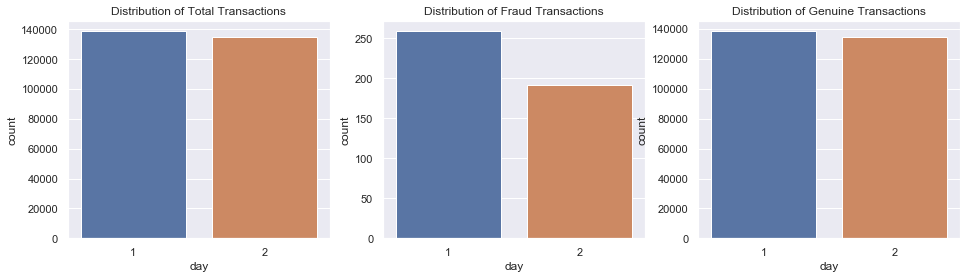

In [34]:
fig,axs=plt.subplots(ncols=3,figsize=(16,4))



sns.countplot(df['day'],ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")



sns.countplot(df[(df['class']==1)]['day'],ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")



sns.countplot(df[(df['class']==0)]['day'],ax=axs[2])
axs[2].set_title("Distribution of Genuine Transactions")



plt.show()

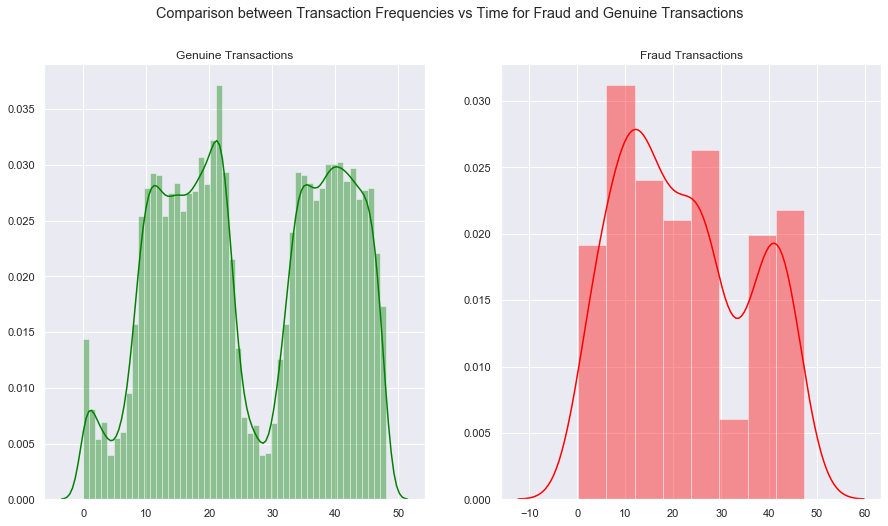

In [35]:
# Time plots 

fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,8))

sns.distplot(df[df['class']==0]['time'].values,color='green',ax=axs[0])
axs[0].set_title('Genuine Transactions')

sns.distplot(df[df['class']==1]['time'].values,color='red',ax=axs[1])
axs[1].set_title('Fraud Transactions')
fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Genuine Transactions')
plt.show()

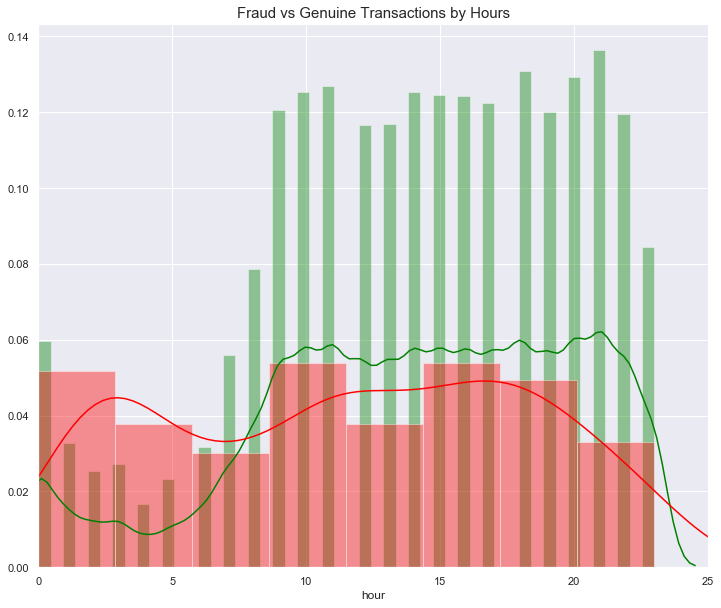

In [36]:
# Let's see if we find any particular pattern between time ( in hours) and Fraud vs Genuine Transactions

plt.figure(figsize=(12,10))
sns.distplot(df[df['class']==0]["hour"],color='green')# Genuine -green
sns.distplot(df[df['class']==1]["hour"],color='red')# Fraudulent -Red
plt.title('Fraud vs Genuine Transactions by Hours',fontsize=15)
plt.xlim([0,25])
plt.show()

Above graph shows that most of the Fraud transactions are happening at night time (0 to 7 hours)when most of the people are sleeping and Genuine transaction are happening during day time (9 to 21hours).

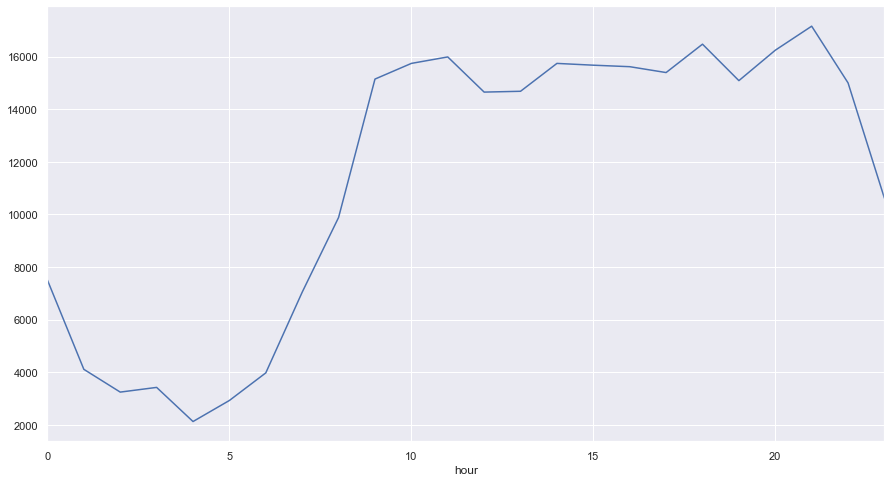

In [37]:
plt.figure(figsize=(15,8))
df[['time','hour','day','amount','class']].groupby('hour').count()['class'].plot()
plt.show()

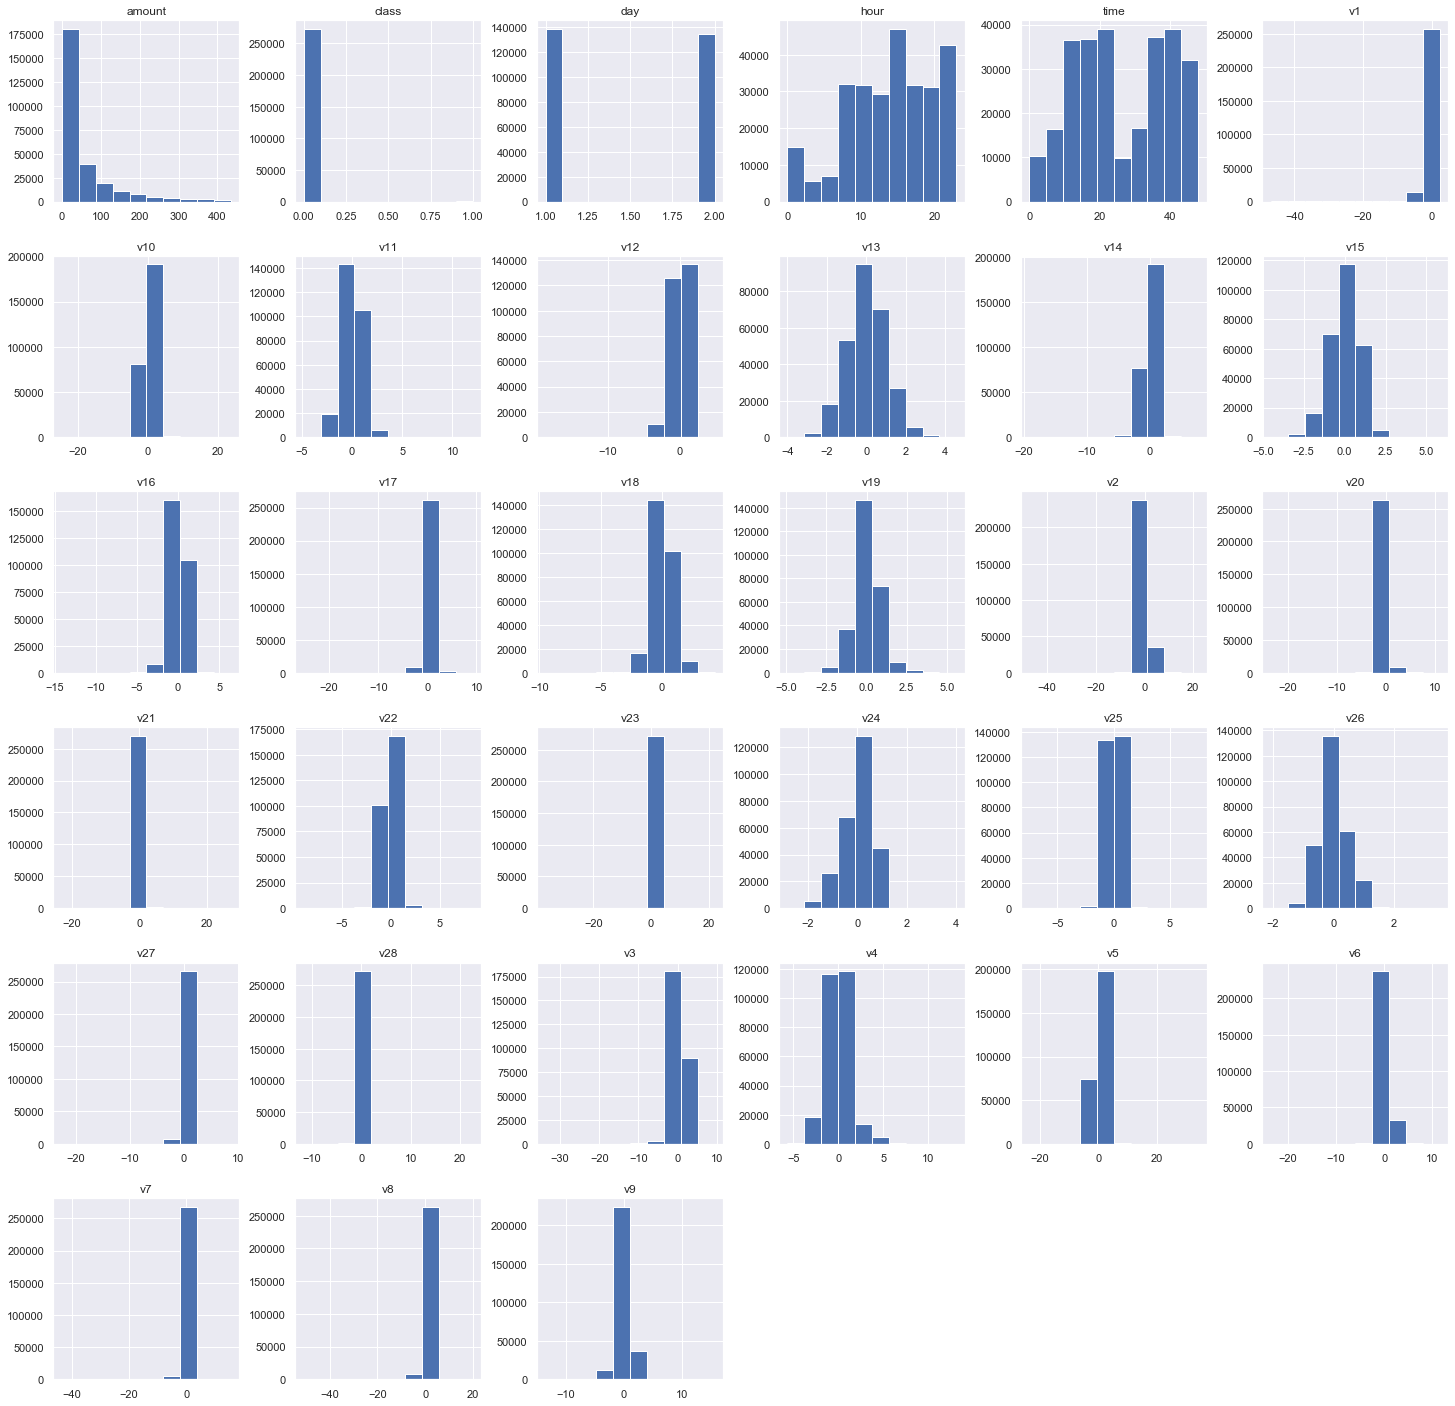

In [38]:
df.hist(figsize=(25,25))
plt.show()

In [39]:
#Reset the index
df.reset_index(inplace=True,drop=True)


## Scale Amount Feature

PCA Transformation: The description of the data says that all the features went through a PCAtransformation (Dimensionality Reduction technique) except for time and amount.

In general, there are as many principal components in your data as there are dimensions in the original data. So if your original data could be expressed using two dimensions, it will have two principal components, and these principal components are directions which capture the maximum variance in your data.

The direction along which this variance is maximized is the first principal component of the original data. Find the next best direction, the second principal component, which must be at right angles to the first. Directions at right angles help express the most
variation with the smallest number of directions. 




Scaling: Keep in mind that in order to implement a PCA transformation features need to be previouslyscaled.

<img src="pca1.png" width = '400' height = '400' />

<img src="pca2.png" width = '400' height = '400' />

<img src="pca3.png" width = '400' height = '400' />

<img src="pca4.png" width = '400' height = '400' />

### Scale amount by Log

**Scaling using the log**: It is used to respond to skewness towards large values; i.e., cases in which one or a few points aremuch larger than the bulk of the data and to show per cent change.

In [40]:
# Scale amount by log
df['amount_log']=np.log(df.amount+0.01)

### Scale amount by Standardization

**Standardization** is another scaling technique where the values are centered around the mean with a unitstandard deviation. This means that the mean of the attribute becomes zero and the resultant distributionhas a unit standard deviation.

<img src="standardization.png" width = '150' height = '100' />

In [41]:
from sklearn.preprocessing import StandardScaler


# importing a class from a module of a library


ss=StandardScaler()
# object of the class StandardScaler ()

df['amount_scaled']=ss.fit_transform(df['amount'].values.reshape(-1,1))

### Scale amount by Normalization

**Normalization** is a scaling technique in which values are shifted and rescaled so that they end up rangingbetween 0 and 1. It is also known as Min-Max scaling.

<img src="normalization.png" width = '150' height = '100' />

In [42]:
from sklearn.preprocessing import MinMaxScaler 

mm=MinMaxScaler()
# object of the class StandardScaler ()

df['amount_minmax']=mm.fit_transform(df['amount'].values.reshape(-1,1))

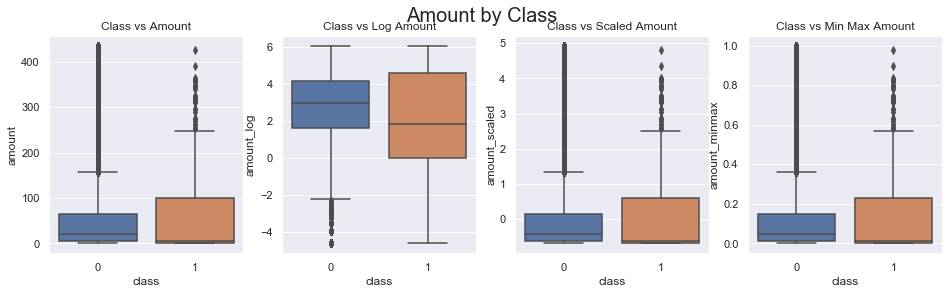

In [43]:
#Feature engineering to a better visualization of the values
# Let's explore the Amount by Class and see the distribuition of Amount transactions


fig,axs=plt.subplots(nrows=1,ncols=4,figsize=(16,4))

sns.boxplot(x="class",y="amount",data=df,ax=axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x="class",y="amount_log",data=df,ax=axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x="class",y="amount_scaled",data=df,ax=axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x="class",y="amount_minmax",data=df,ax=axs[3])
axs[3].set_title("Class vs Min Max Amount")

fig.suptitle('Amount by Class', fontsize=20)

plt.show()

**Scaling the amount by log will best suit.**

In [44]:
df[['time','hour','day','amount','amount_log','amount_scaled','amount_minmax','class']]

,time,hour,day,amount,amount_log,amount_scaled,amount_minmax,class
0,0.000000,0,1,149.62,5.008166,1.245932,0.343962,0
1,0.000000,0,1,2.69,0.993252,-0.649372,0.006184,0
2,0.000278,0,1,378.66,5.936665,4.200403,0.870503,0
3,0.000278,0,1,123.50,4.816322,0.909000,0.283915,0
4,0.000556,0,1,69.99,4.248495,0.218755,0.160900,0
5,0.000556,0,1,3.67,1.302913,-0.636731,0.008437,0
6,0.001111,0,1,4.99,1.609438,-0.619704,0.011472,0
7,0.001944,0,1,40.80,3.708927,-0.157777,0.093795,0
8,0.001944,0,1,93.20,4.534855,0.518149,0.214258,0
9,0.002500,0,1,3.68,1.305626,-0.636602,0.008460,0


## Saving preprossed data as serialized files

To deploy the predictive models built we save them along with the required data files as serialized fileobjectsWe save cleaned and processed input data, tuned predictive models as files so that they can later bere-used/shared

In [131]:
CreditCardFraudDataCleaned=df


# Saving the Python objects as serialized files can be done using pickle library

#let save the Final Data set after all the transformations asa file


with open('CreditCardFraudDataCleaned.pkl','wb') as fileWriteStream:
    pickle.dump(CreditCardFraudDataCleaned,fileWriteStream)
    #Close the filestream!
    fileWriteStream.close()
    #print('pickle file is saved at Location:',os.getcwd())

## Load preprocessed data

In [46]:
# Reading a Pickle file
with open('CreditCardFraudDataCleaned.pkl','rb')as fileReadStream:
    CreditCardFraudDataFromPickle = pickle.load(fileReadStream)
    #close the filestream!
    fileReadStream.close()
    
# Checking the data read from pickle file. It is exactly same as the DiamondPricesData
df=CreditCardFraudDataFromPickle
df.head()

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v26,v27,v28,amount,class,hour,day,amount_log,amount_scaled,amount_minmax
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.245932,0.343962
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.649372,0.006184
2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.200403,0.870503
3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.909000,0.283915
4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.218755,0.160900


In [47]:
df.shape

(273441, 36)

## Splitting data into Training and Testingsamples

In [48]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_log', 'amount_scaled', 'amount_minmax'],
      dtype='object')

In [49]:
# Separate Target Variable and Predictor Variables


X=df.drop(['time','class','hour','day','amount','amount_minmax','amount_scaled'],axis=1)
y=df['class']

In [50]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495


In [51]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [52]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split


# Split the data into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [53]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (191408, 29)
y_train -  (191408,)
X_test -  (82033, 29)
y_test -  (82033,)


## Baseline for models

1 Classification Models
- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes

2 Class Imbalance Solutions
- Under Sampling
- Over Sampling
- SMOTE
- ADASYN

3 Metrics
- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score 

## Model Building

## 1. Logistic Regression

### 1.1 Logistic Regression with __imbalanced__ data

In [54]:
from sklearn.linear_model import LogisticRegression
# Importing Classifier Step

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [56]:
# Predict from Test set
y_pred=logreg.predict(X_test)

## Model Evolution

In [57]:
from sklearn import metrics

print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81897
           1       0.87      0.62      0.72       136

    accuracy                           1.00     82033
   macro avg       0.93      0.81      0.86     82033
weighted avg       1.00      1.00      1.00     82033



In [58]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred,y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test,y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))


Accuracy :0.99921
AUC : 0.80874
Precision : 0.86598
Recall : 0.61765
F1 : 0.72103


In [59]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    81936
1       97
dtype: int64

**Model predicted 97 transactions as fraud and 81936 transactions as genuine from the test dataset.**

In [60]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    81897
1      136
Name: class, dtype: int64

**There are originally 136 fraud transactions and our model predicted only 97 fraud transaction.**

### Model Evolution Matrix

**Accuracy , Precision , Recall , F1 Score and Specificity**
- Accuracy: What proportion of actual positives and negatives is correctly classified?
- Precision: What proportion of predicted positives are truly positive ?
-  Recall: What proportion of actual positives is correctly classified ?
-  F1 Score : Harmonic mean of Precision and Recall
-  Specificity: The specificity of a model is defined by the proportion of actual negatives that are classified as Negatives ,i.e = TN / ( TN + FP )

<img src="cm1.png" width = '400' height = '400' />

<img src="cm2.png" width = '400' height = '400' />

<img src="cm3.png" width = '400' height = '400' />

<img src="cm4.png" width = '400' height = '400' />

<img src="cm5.png" width = '400' height = '400' />

In [61]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[81884,    13],
       [   52,    84]], dtype=int64)

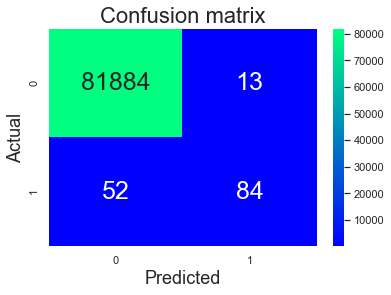

In [62]:
# Heatmap for Confusion Matrix
p=sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,annot_kws={"size":25},cmap="winter",fmt='g')

plt.title('Confusion matrix',y=1.1,fontsize=22)
plt.ylabel('Actual',fontsize=18)
plt.xlabel('Predicted',fontsize=18)

plt.show()

**There are 84 transaction recognised as True Postive, means they are orignally fraud transactions andour model precited them as fraud.**
- True Negative - 81884 (truely saying negative - genuine transaction correctly identified as genuine)
- True Postive - 84 (truely saying positive - fraud transaction correctly identified as fraud)
- False Negative - 52 ( falsely saying negative - fraud transaction incorrectly identified as genuine)
- False Positive - 13 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

### Receiver Operating Characteristics (ROC)

The ROC is a performance measurement for classification problems at various thresholds. It is essentially aprobability curve, and the higher the Area Under the Curve (AUC) score the better the model is at predictingfraudulent/non-fraudulent transactions.It is an evaluation metric that helps identify the strength of the model to distinguish between two outcomes.It defines if a model can create a clear boundary between the postive and the negative class.

We want the true positive rate to be as high as possible. That's pretty obvious. In addition, we want the false positive rate to be as low as possible. Once again, pretty obvious. This curve that we'll draw here, true positive rate versus false positive rate, is the ROC curve, or the Receiver Operating Characteristic. So how do we get this curve and how will that help us determine the right value of P threshold.

<img src="roc1.png" width = '500' height = '400' />

In [63]:
metrics.roc_auc_score(y_test,y_pred)

0.8087441614251474

In [64]:
y_pred_proba=logreg.predict_proba(X_test)
y_pred_proba

array([[9.99980849e-01, 1.91513420e-05],
       [9.99989046e-01, 1.09538269e-05],
       [9.99832228e-01, 1.67772145e-04],
       ...,
       [9.99982585e-01, 1.74150469e-05],
       [9.99204300e-01, 7.95699728e-04],
       [9.99814095e-01, 1.85904727e-04]])

AUC -  0.8087441614251474 



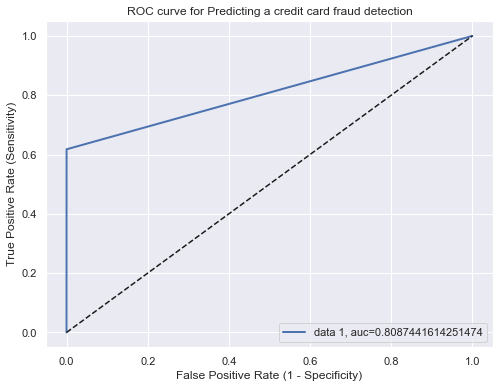

In [65]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)


auc=metrics.roc_auc_score(y_test,y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2,label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1],[0,1],'k--')

plt.rcParams['font.size']=12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

## Class Imbalance

Imbalanced data typically refers to a problem with classification problems where the classes are notrepresented equally. If one applies classifiers on the dataset, they are likely to predict everything as themajority class. This was often regarded as a problem in learning from highly imbalanced datasets.

**Tactics To Combat Imbalanced Training Data**

- Collect More Data: A larger dataset might expose a different and perhaps more balanced perspective on the classes.
- Changing Performance Metric: 
    1. Confusion Matrix: A breakdown of predictions into a table showing correct predictions (the diagonal) and the types of incorrect predictions made (what classes incorrect predictions were assigned).
    2. Precision: A measure of a classifiers exactness.
    3. Recall: A measure of a classifiers completeness
    4. F1 Score (or F-score): A weighted average of precision and recall.
    5. ROC Curves: Like precision and recall, accuracy is divided into sensitivity and specificity and models can be chosen based on the balance thresholds of these values.
- Resampling Your Dataset: change the dataset that you use to build your predictive model to have more balanced data. This change is called sampling your dataset which can be done either by adding copies of instances from the under-represented class called **over-sampling** or delete instances from the over-represented class, called **under-sampling**.

    Consider testing under-sampling when you have an a lot data (tens- or hundreds of thousands of instances or more)
    Consider testing over-sampling when you don’t have a lot of data (tens of thousands of records or less)
    Consider testing random and non-random (e.g. stratified) sampling schemes.
    Consider testing different resampled ratios (e.g. you don’t have to target a 1:1 ratio in a binary classification problem, try other ratios)

- Generate Synthetic Samples: There are systematic algorithms that you can use to generate synthetic samples. The most popular of such algorithms is called **SMOTE** or the Synthetic Minority Over-sampling Technique.  The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.It works by creating synthetic samples from the minor class instead of creating copies.
- Using Penalized Models: Penalized classification imposes an additional cost on the model for making classification mistakes on the minority class during training. These penalties can bias the model to pay more attention to the minority class. 
- Anomaly detection is the detection of rare events. This might be a machine malfunction indicated through its vibrations or a malicious activity by a program indicated by it’s sequence of system calls. The events are rare and when compared to normal operation. This shift in thinking considers the minor class as the outliers class which might help you think of new ways to separate and classify samples.

<img src="oversampling.png" width = '500' height = '400' />

<img src="undersampling.png" width = '500' height = '400' />

## Synthetic Minority OverSampling Technique (SMOTE)

In this technique, instead of simply duplicating data from the minority class, we synthesize new data fromthe minority class. This is a type of data augmentation for tabular data can be very effective. 

<img src="smote.png" width = '500' height = '400' />

## Adaptive Synthetic Sampling Method for Imbalanced Data(ADASYN)

 The biggest advantages of ADASYN are it’s adaptive nature of creating more data for “harder-to-learn” examples and allowing you to sample more negative data for your model. Using ADASYN, you can ultimately synthetically balance your data set!

## Import imbalace technique algorithims

In [66]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report
from imblearn.over_sampling import SMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler

## 1.2 Logistic Regression with Random Undersamplingtechnique

In [67]:
from collections  import Counter
# counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [68]:
print('Original dataset shape %s'%Counter(y))
rus=RandomUnderSampler(random_state=42)
X_res,y_res=rus.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_res))

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 451, 1: 451})


In [69]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)

# Undersampling with Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [70]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred,y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test,y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))

Accuracy :0.93358
AUC : 0.93497
Precision : 0.96947
Recall : 0.90071
F1 : 0.93382


In [71]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
print("AUC - ",auc,"\n")

AUC -  0.9349699945444626 



<Figure size 576x432 with 0 Axes>

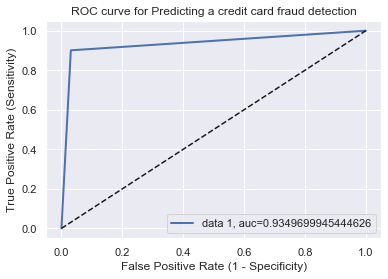

<Figure size 576x432 with 0 Axes>

In [77]:
plt.plot(fpr,tpr,linewidth=2,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.figure(figsize=(8,6))
plt.show()

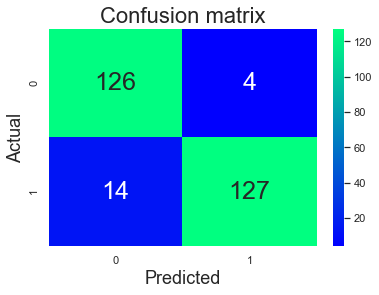

In [78]:
# Heatmap for Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,annot_kws={"size":25},cmap="winter",fmt='g')
plt.title('Confusion matrix',y=1.1,fontsize=22)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

## 1.3.Logistic Regression with Random Oversampling technique

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [82]:
print('Original dataset shape %s'%Counter(y)) 
random_state=42
ros=RandomOverSampler(random_state=random_state)
X_res,y_res=ros.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_res))

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)
# Oversampling with Logistic Regression

logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [84]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred,y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test,y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))

Accuracy :0.95091
AUC : 0.95095
Precision : 0.97898
Recall : 0.92175
F1 : 0.94951


AUC -  0.950952415404272 



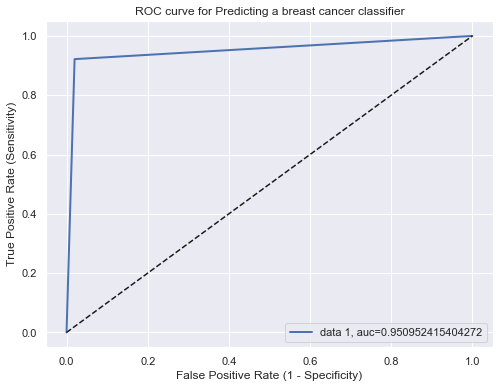

In [88]:
# plot ROC Curve

plt.figure(figsize=(8,6))
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

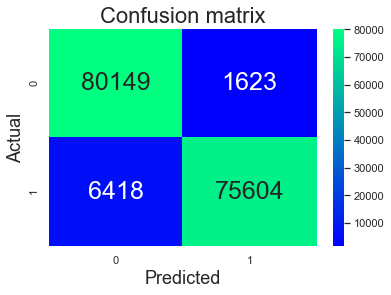

In [89]:
# Heatmap for Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,annot_kws={"size":25},cmap="winter",fmt='g')

plt.title('Confusion matrix',y=1.1,fontsize=22)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

## 1.4 Logistic Regression with SMOTE data

In [90]:
from imblearn.over_sampling import SMOTE,ADASYN

In [91]:
print('Original dataset shape %s'%Counter(y))
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_res))

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


In [92]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)
# SMOTE Sampling with Logistic Regression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [93]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred,y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test,y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))

Accuracy :0.94888
AUC : 0.94893
Precision : 0.97782
Recall : 0.91875
F1 : 0.94737


AUC -  0.9489269653653494 



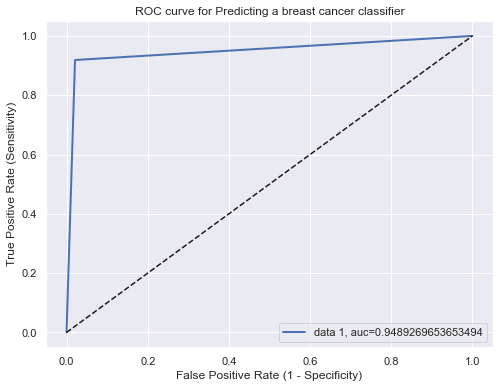

In [95]:
# plot ROC Curve

plt.figure(figsize=(8,6))
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
print("AUC - ",auc,"\n")
plt.plot(fpr,tpr,linewidth=2,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

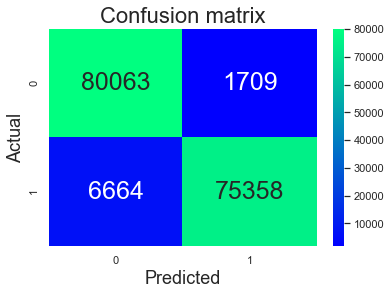

In [96]:
# Heatmap for Confusion Matrix

cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,annot_kws={"size":25},cmap="winter",fmt='g')
plt.title('Confusion matrix',y=1.1,fontsize=22)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

## 1.5 Logistic Regression with ADASYN data

In [97]:
print('Original dataset shape %s'%Counter(y))
adasyn=ADASYN(random_state=42)
X_res,y_res=adasyn.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_res))

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({1: 273021, 0: 272990})


In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)

#  ADASYN Sampling with Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [99]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred,y_test)))
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test,y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test,y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test,y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test,y_pred)))

Accuracy :0.89181
AUC : 0.89184
Precision : 0.91156
Recall : 0.86809
F1 : 0.88930


AUC -  0.8918375540058016 



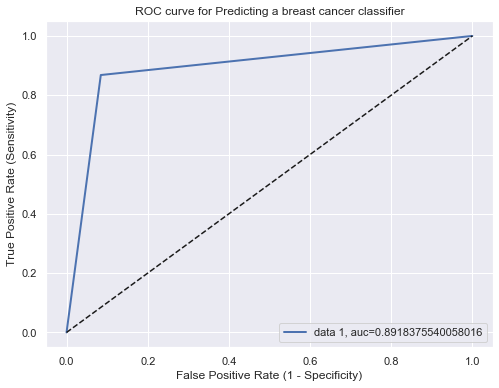

In [102]:
# plot ROC Curve
plt.figure(figsize=(8,6))
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
print("AUC - ",auc,"\n")
plt.plot(fpr,tpr,linewidth=2,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0,1],[0,1],'k--')
plt.rcParams['font.size']=12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

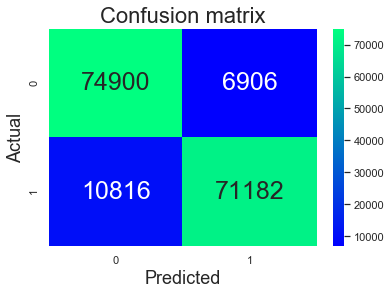

In [103]:
# Heatmap for Confusion Matrix
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,annot_kws={"size":25},cmap="winter",fmt='g')
plt.title('Confusion matrix',y=1.1,fontsize=22)
plt.xlabel('Predicted',fontsize=18)
plt.ylabel('Actual',fontsize=18)
plt.show()

Imbalance dataset have Recall score of only 61.77%. Itmeans that creating a model from the imbalanced dataset is highly biasedtowards genuine transactions and creates a model which is not able to predictthe fraudulent transactions correctly. However, the balanced dataset hasRecall score of above 87%.

## Spatial nature of class imbalance

Will reduce 29 columns to 2 columns with the help of Principal Component Analysis so as plot a graph

In [108]:
from sklearn.decomposition import PCA
X_reduced_pca_im=PCA(n_components=2,random_state=42).fit_transform(X)

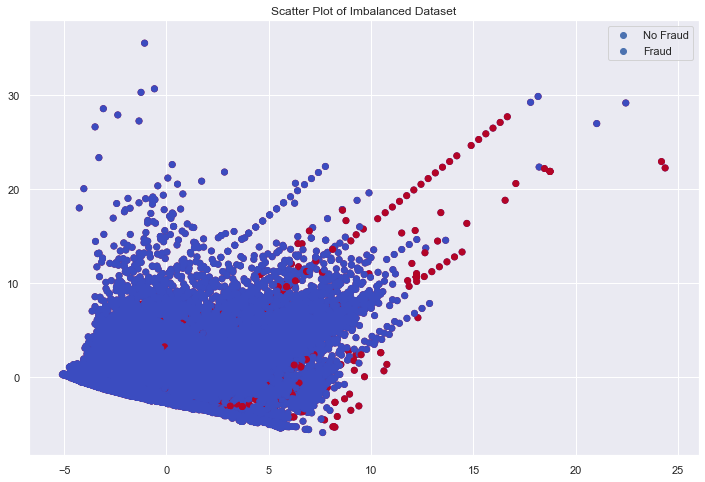

In [109]:
# Generate and plot a synthetic imbalanced classification dataset

plt.figure(figsize=(12,8))
plt.scatter(X_reduced_pca_im[:,0],X_reduced_pca_im[:,1],c=(y==0),label='No Fraud',cmap='coolwarm',linewidths=1)
plt.scatter(X_reduced_pca_im[:,0],X_reduced_pca_im[:,1],c=(y==1),label='Fraud',cmap='coolwarm',linewidths=1)
plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

In [110]:
X_reduced_pca=PCA(n_components=2,random_state=42).fit_transform(X_res)

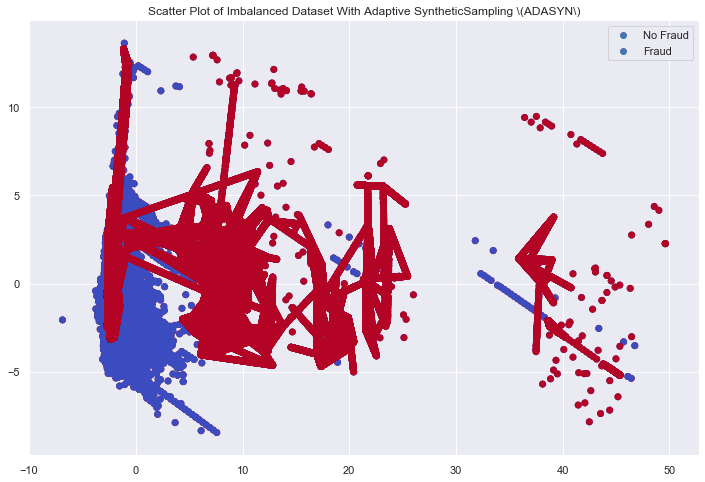

In [111]:
# Oversample and plot imbalanced dataset with ADASYN

plt.figure(figsize=(12,8))
plt.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(y_res==0),cmap='coolwarm',label='No Fraud',linewidths=1)
plt.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(y_res==1),cmap='coolwarm',label='Fraud',linewidths=1)
plt.title("Scatter Plot of Imbalanced Dataset With Adaptive SyntheticSampling \(ADASYN\)")
plt.legend()
plt.show()

## Building different models with different balanced datasets

## 1. Undersampled Data

In [113]:
print('Original dataset shape %s'%Counter(y))
rus=RandomUnderSampler(random_state=42)
X_under,y_under=rus.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_under))

# Slit into train and test datasets

X_train_under,X_test_under,y_train_under,y_test_under=train_test_split(X_under,y_under,test_size=0.3,random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 451, 1: 451})


## 2. Oversampled Data

In [114]:
print('Original dataset shape %s'%Counter(y))
ros=RandomOverSampler(random_state=42)
X_over,y_over=ros.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_over))
# Slit into train and test datasets
X_train_over,X_test_over,y_train_over,y_test_over=train_test_split(X_over,y_over,test_size=0.3,random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


## 3. SMOTE Data

In [115]:
print('Original dataset shape %s'%Counter(y))
smote=SMOTE(random_state=42)
X_smote,y_smote=smote.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_smote))

# Slit into train and test datasets

X_train_smote,X_test_smote,y_train_smote,y_test_smote=train_test_split(X_smote,y_smote,test_size=0.3,random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({0: 272990, 1: 272990})


## 4. ADASYN Data

In [116]:
print('Original dataset shape %s'%Counter(y))
adasyn=ADASYN(random_state=42)
X_adasyn,y_adasyn=adasyn.fit_resample(X,y)
print('Resampled dataset shape %s'%Counter(y_adasyn))
# Slit into train and test datasets
X_train_adasyn,X_test_adasyn,y_train_adasyn,y_test_adasyn=train_test_split(X_adasyn,y_adasyn,test_size=0.3,random_state=0)

Original dataset shape Counter({0: 272990, 1: 451})
Resampled dataset shape Counter({1: 273021, 0: 272990})


In [117]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [118]:
names_lst=[]
aucs_lst=[]
accuracy_lst=[]
precision_lst=[]
recall_lst=[]
f1_lst=[]

##  Function for model building and performance measure

In [122]:
def build_measure_model(models):
    plt.figure(figsize=(12,6))
    for name,model,Xdata,ydata in models:
        names_lst.append(name)
        # split data in train test set
        X_train,X_test,y_train,y_test=train_test_split(Xdata,ydata,test_size=0.3,random_state=0)
        # Build model
        model.fit(X_train,y_train)
        # Predict
        y_pred=model.predict(X_test)
        
        # calculate accuracy
        Accuracy=metrics.accuracy_score(y_pred,y_test)
        accuracy_lst.append(Accuracy)
        
        # calculate auc
        Aucs=metrics.roc_auc_score(y_test,y_pred)
        aucs_lst.append(Aucs)
        
        # calculate precision
        PrecisionScore=metrics.precision_score(y_test,y_pred)
        precision_lst.append(PrecisionScore)
        
        # calculate recall
        RecallScore=metrics.recall_score(y_test,y_pred)
        recall_lst.append(RecallScore)
        
        # calculate f1 score
        F1Score=metrics.f1_score(y_test,y_pred)
        f1_lst.append(F1Score)
        
        # draw confusion matrix
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
        
        print("Model Name :",name)
        print('Accuracy :{0:0.5f}'.format(Accuracy))
        print('AUC : {0:0.5f}'.format(Aucs))
        print('Precision : {0:0.5f}'.format(PrecisionScore))
        print('Recall : {0:0.5f}'.format(RecallScore))
        print('F1 : {0:0.5f}'.format(F1Score))
        print('Confusion Matrix : \n',cnf_matrix)
        print("\n")
        
        # plot ROC Curve
        fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)
        auc=metrics.roc_auc_score(y_test,y_pred)
        plt.plot(fpr,tpr,linewidth=2,label=name+", auc="+str(auc))
        
    plt.legend(loc=4)
    plt.plot([0,1],[0,1],'k--')
    plt.rcParams['font.size']=12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

## Logistic Regression (LR)

Model Name : LR imbalance
Accuracy :0.99926
AUC : 0.81978
Precision : 0.87879
Recall : 0.63971
F1 : 0.74043
Confusion Matrix : 
 [[81885    12]
 [   49    87]]


Model Name : LR Undersampling
Accuracy :0.93358
AUC : 0.93497
Precision : 0.96947
Recall : 0.90071
F1 : 0.93382
Confusion Matrix : 
 [[126   4]
 [ 14 127]]


Model Name : LR Oversampling
Accuracy :0.95090
AUC : 0.95095
Precision : 0.97897
Recall : 0.92175
F1 : 0.94950
Confusion Matrix : 
 [[80148  1624]
 [ 6418 75604]]


Model Name : LR SMOTE
Accuracy :0.94889
AUC : 0.94894
Precision : 0.97784
Recall : 0.91877
F1 : 0.94738
Confusion Matrix : 
 [[80064  1708]
 [ 6663 75359]]


Model Name : LR ADASYN
Accuracy :0.89180
AUC : 0.89183
Precision : 0.91157
Recall : 0.86807
F1 : 0.88929
Confusion Matrix : 
 [[74901  6905]
 [10818 71180]]




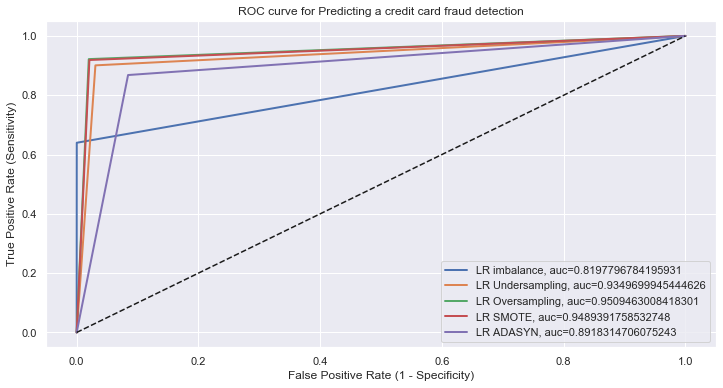

In [123]:
LRmodels=[]
LRmodels.append(('LR imbalance',LogisticRegression(solver='liblinear',multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling',LogisticRegression(solver='liblinear',multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling',LogisticRegression(solver='liblinear',multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE',LogisticRegression(solver='liblinear',multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN',LogisticRegression(solver='liblinear',multi_class='ovr'),X_adasyn,y_adasyn))
# Call function to create model and measure its performance
build_measure_model(LRmodels)

## Decision Tree (DT)

Model Name : DT imbalance
Accuracy :0.99921
AUC : 0.88215
Precision : 0.75912
Recall : 0.76471
F1 : 0.76190
Confusion Matrix : 
 [[81864    33]
 [   32   104]]


Model Name : DT Undersampling
Accuracy :0.92251
AUC : 0.92313
Precision : 0.94118
Recall : 0.90780
F1 : 0.92419
Confusion Matrix : 
 [[122   8]
 [ 13 128]]


Model Name : DT Oversampling
Accuracy :0.99976
AUC : 0.99976
Precision : 0.99952
Recall : 1.00000
F1 : 0.99976
Confusion Matrix : 
 [[81733    39]
 [    0 82022]]


Model Name : DT SMOTE
Accuracy :0.99834
AUC : 0.99834
Precision : 0.99769
Recall : 0.99900
F1 : 0.99834
Confusion Matrix : 
 [[81582   190]
 [   82 81940]]


Model Name : DT ADASYN
Accuracy :0.99876
AUC : 0.99876
Precision : 0.99814
Recall : 0.99939
F1 : 0.99876
Confusion Matrix : 
 [[81653   153]
 [   50 81948]]




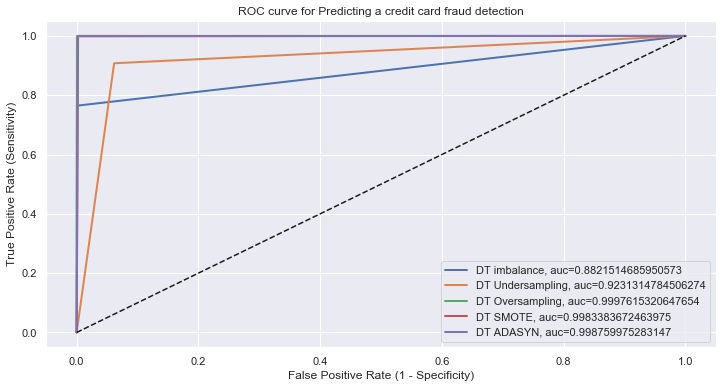

In [124]:
DTmodels=[]

dt=DecisionTreeClassifier()

DTmodels.append(('DT imbalance',dt,X,y))
DTmodels.append(('DT Undersampling',dt,X_under,y_under))
DTmodels.append(('DT Oversampling',dt,X_over,y_over))
DTmodels.append(('DT SMOTE',dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN',dt,X_adasyn,y_adasyn))
# Call function to create model and measure its performance
build_measure_model(DTmodels)

## Random Forest (RF)

Model Name : RF imbalance
Accuracy :0.99960
AUC : 0.90070
Precision : 0.94783
Recall : 0.80147
F1 : 0.86853
Confusion Matrix : 
 [[81891     6]
 [   27   109]]


Model Name : RF Undersampling
Accuracy :0.92989
AUC : 0.93172
Precision : 0.97656
Recall : 0.88652
F1 : 0.92937
Confusion Matrix : 
 [[127   3]
 [ 16 125]]


Model Name : RF Oversampling
Accuracy :0.99995
AUC : 0.99994
Precision : 0.99989
Recall : 1.00000
F1 : 0.99995
Confusion Matrix : 
 [[81763     9]
 [    0 82022]]


Model Name : RF SMOTE
Accuracy :0.99986
AUC : 0.99986
Precision : 0.99972
Recall : 1.00000
F1 : 0.99986
Confusion Matrix : 
 [[81749    23]
 [    0 82022]]


Model Name : RF ADASYN
Accuracy :0.99985
AUC : 0.99985
Precision : 0.99971
Recall : 0.99999
F1 : 0.99985
Confusion Matrix : 
 [[81782    24]
 [    1 81997]]




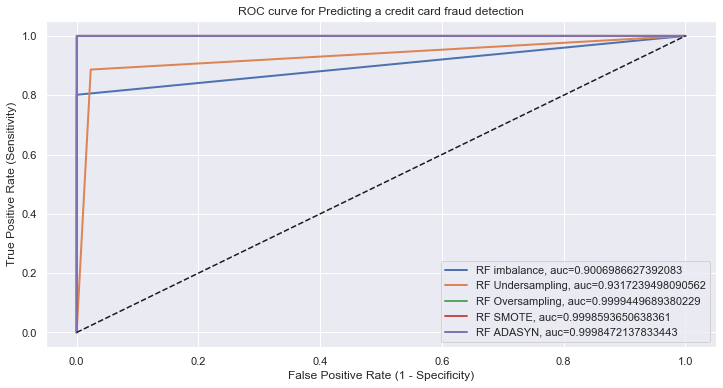

In [125]:
RFmodels=[]
RFmodels.append(('RF imbalance',RandomForestClassifier(),X,y))
RFmodels.append(('RF Undersampling',RandomForestClassifier(),X_under,y_under))
RFmodels.append(('RF Oversampling',RandomForestClassifier(),X_over,y_over))
RFmodels.append(('RF SMOTE',RandomForestClassifier(),X_smote,y_smote))
RFmodels.append(('RF ADASYN',RandomForestClassifier(),X_adasyn,y_adasyn))
# Call function to create model and measure its performance
build_measure_model(RFmodels)

## Naive Bayes (NB)

Model Name : NB imbalance
Accuracy :0.97880
AUC : 0.91598
Precision : 0.06322
Recall : 0.85294
F1 : 0.11771
Confusion Matrix : 
 [[80178  1719]
 [   20   116]]


Model Name : NB Undersampling
Accuracy :0.92989
AUC : 0.93172
Precision : 0.97656
Recall : 0.88652
F1 : 0.92937
Confusion Matrix : 
 [[127   3]
 [ 16 125]]


Model Name : NB Oversampling
Accuracy :0.92797
AUC : 0.92804
Precision : 0.97374
Recall : 0.87989
F1 : 0.92444
Confusion Matrix : 
 [[79826  1946]
 [ 9852 72170]]


Model Name : NB SMOTE
Accuracy :0.92412
AUC : 0.92420
Precision : 0.97366
Recall : 0.87207
F1 : 0.92007
Confusion Matrix : 
 [[79837  1935]
 [10493 71529]]


Model Name : NB ADASYN
Accuracy :0.73531
AUC : 0.73557
Precision : 0.92066
Recall : 0.51568
F1 : 0.66108
Confusion Matrix : 
 [[78162  3644]
 [39713 42285]]




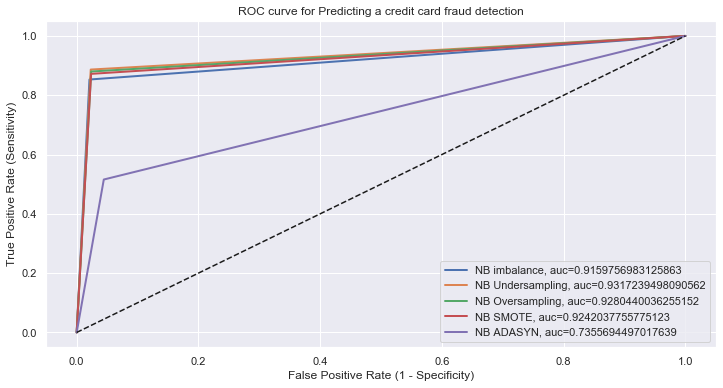

In [126]:
NBmodels=[]
NBmodels.append(('NB imbalance',GaussianNB(),X,y))
NBmodels.append(('NB Undersampling',GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling',GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE',GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN',GaussianNB(),X_adasyn,y_adasyn))
# Call function to create model and measure its performance
build_measure_model(NBmodels)

## Performance measures of various classifiers

In [127]:
data={'Model':names_lst,'Accuracy':accuracy_lst,'AUC':aucs_lst,'PrecisionScore':precision_lst,'RecallScore':recall_lst,'F1Score':f1_lst}
print("Performance measures of various classifiers: \n")
performance_df=pd.DataFrame(data)
performance_df.sort_values(['AUC','RecallScore','F1Score'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy,AUC,PrecisionScore,RecallScore,F1Score
12,RF Oversampling,0.999945,0.999945,0.999890,1.000000,0.999945
13,RF SMOTE,0.999860,0.999859,0.999720,1.000000,0.999860
14,RF ADASYN,0.999847,0.999847,0.999707,0.999988,0.999848
7,DT Oversampling,0.999762,0.999762,0.999525,1.000000,0.999762
9,DT ADASYN,0.998761,0.998760,0.998136,0.999390,0.998763
8,DT SMOTE,0.998339,0.998338,0.997687,0.999000,0.998343
2,LR Oversampling,0.950902,0.950946,0.978971,0.921753,0.949501
3,LR SMOTE,0.948893,0.948939,0.977837,0.918766,0.947382
1,LR Undersampling,0.933579,0.934970,0.969466,0.900709,0.933824
11,RF Undersampling,0.929889,0.931724,0.976562,0.886525,0.929368


## Conclusion

- All of the scores for **Random Forest with Oversampling technique and the Random Forest with SMOTE technique models** are very promising for ourdataset. 
- In the ROC graph, the AUC scores for Random Forest with Oversampling technique is pretty high,which is desirable. As we move further right along the curve, we both capture more TruePositives but also incur more False Positives.
- Random Forest with Oversampling technique gives highest Recall score.

## Grid Search

- Grid search is the process of performing hyper parameter tuning in order to determine the optimal values fora given model. This is significant as the performance of the entire model is based on the hyper parametervalues specified.
- A model hyperparameter is a characteristic of a model that is external to the model and whose valuecannot be estimated from data. 
- The value of the hyperparameter has to be set before the learning processbegins. Example, beta coefficients of linear/logistic regression

In [128]:
# Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV 

## 1. Grid Search with Logistic Regression

In [129]:
log_reg_params={"solver":['saga'],"penalty":['l1','l2'],'C':[0.01,0.1,1,10,100],"max_iter":[100000]},

grid_log_reg=GridSearchCV(LogisticRegression(),log_reg_params)
grid_log_reg.fit(X_train_under,y_train_under)

# Logistic Regression best estimator

print("Logistic Regression best estimator : \n",grid_log_reg.best_estimator_)



# predict test dataset

y_pred_lr=grid_log_reg.predict(X_test_under)


# f1 score

print('\nLogistic Regression f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under,y_pred_lr)))

Logistic Regression best estimator : 
 LogisticRegression(C=1, max_iter=100000, solver='saga')

Logistic Regression f1 Score : 0.93040


## 2. Grid Search with Decision Tree Classifier

In [130]:
tree_params={"criterion":["gini","entropy"],"max_depth":list(range(2,4,1)),"min_samples_leaf":list(range(5,7,1))}
grid_tree=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=tree_params,scoring='accuracy',cv=5,verbose=1,n_jobs=-1)
grid_tree.fit(X_train_under,y_train_under)


# tree best estimator

print("Decision Tree best estimator : \n",grid_tree.best_estimator_)


# predict test dataset

y_pred_dt=grid_tree.predict(X_test_under)


# f1 score

print('\nf1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under,y_pred_dt)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Decision Tree best estimator : 
 DecisionTreeClassifier(max_depth=2, min_samples_leaf=5)

f1 Score : 0.90714


### The Random Forest Model with Oversampling technique as the better model, which obtained recall score of 99% on the test set.